# Marks Prediction

In [96]:
# Library import
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt

In [97]:
# import dataset
# '''The r prefix on strings stands for “raw strings”'''
path = r"https://github.com/Chandon-Roy/Datasets/raw/main/students_reading_time_mark.csv"
df = pd.read_csv(path)

In [98]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [100]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [101]:
df.shape

(200, 2)

In [102]:
# print(df.to_string()) # Using the ''to_string()'' method in pandas return the hole datasets

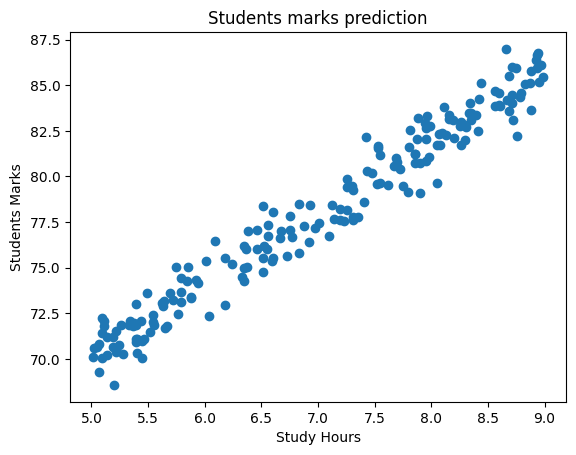

In [103]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Study Hours')
plt.ylabel('Students Marks')
plt.title('Students marks prediction')
plt.show()

## Prepare Data for Machine Learning Models


In [104]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [105]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [106]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [107]:
cdf = df.fillna(df.mean())

In [108]:
cdf.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [109]:
# Feature Selecton ,Split
X = cdf[['study_hours']] # Matrix
y = cdf['student_marks']#Vector

'''
X = cdf.drop("student_marks", axis = "columns")
y = cdf.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)
'''

'\nX = cdf.drop("student_marks", axis = "columns")\ny = cdf.drop("study_hours", axis = "columns")\nprint("shape of X = ", X.shape)\nprint("shape of y = ", y.shape)\n'

In [110]:
# train_text_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 51)  # In Machine Learning has differents ''random_state = 51'' package
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 1), (160, 1), (40,), (160,))

In [111]:
# Model selection
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# Pradict Calculation
y = m * x + c

<ul><h3>here,</h3>
  <li>m = coefficient(coef) </li>
 <li> c = intercept</li>
 <li> x = durations </li>
 </ul>

In [112]:
m = 49.68531221555223
c = 4.0589233
x = 4
y = m * x + c
y = 4.0589233 * 4 +  49.68531221555223
y

65.92100541555223

In [113]:
# fit the model
lr_model.fit(X_train,y_train)

LinearRegression()

In [114]:
lr_model.intercept_ # abbreviation -- c

49.68531221555223

In [115]:
lr_model.coef_ # abbreviation -- m

array([4.0589233])

In [116]:
#lr_model.predict([[4]])[0][0].round(2) # Put in the ''x_train'' the model accuracy will be return the error like 'Found input variables with inconsistent numbers of samples: [40, 160]'
#y_pred

In [117]:
# Model Predict
y_pred = lr_model.predict(X_test)

In [118]:
# Model Accuracy
lr_model.score(X_test,y_test)

0.9533594128845283

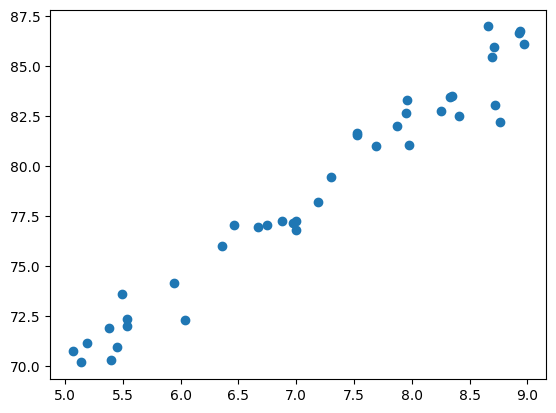

In [119]:
plt.scatter(X_train, y_train)

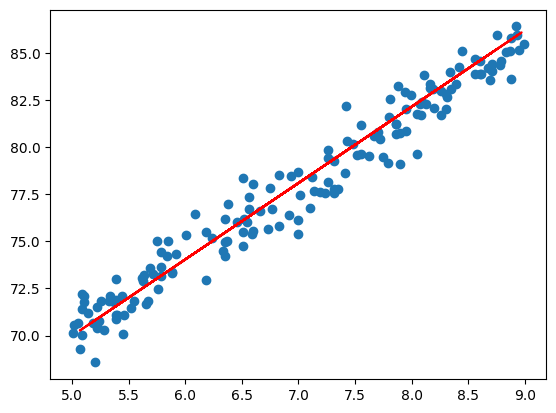

In [120]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr_model.predict(X_train), color = 'r')

# Present your solution

# Save ML Model

In [121]:
import joblib
joblib.dump(lr_model, 'students_marks_predictor_model.pkl')

['students_marks_predictor_model.pkl']

In [122]:
# Model Load
model = joblib.load('students_marks_predictor_model.pkl')

In [123]:
# model.predict([[3]])[0][0].round(2)
model.predict([[3]])[0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.86

In [124]:
#Load_model.   # show all things in this machine learning models

In [125]:
# Concatenate
# p = np.c_[x_test, y_test, y_pred], columns = ['study_hours', 'students_markes_orginal', 'students_marks_predict']

In [126]:
# Model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [127]:
mean_absolute_percentage_error(y_pred,y_test)

0.010866368444271907

In [128]:
mean_absolute_error(y_pred,y_test)

0.8429367981305456

In [129]:
mean_squared_error(y_pred,y_test)

1.0756742327552336

In [130]:
r2_score(y_pred,y_test)

0.9562720644308694